In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 数据生成
from sklearn import datasets
X,y = datasets.make_moons(n_samples=100, noise=0.005, random_state=666)

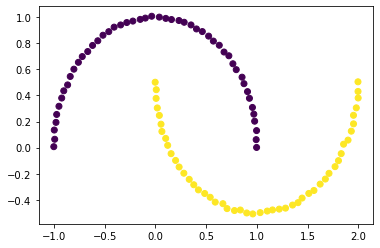

In [2]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [10]:
import numpy as np
import random
# 寻找eps领域内的点

def findNeighbor(j , X, eps):
    N=[]
    for p in range(X.shape[0]): # 找到所有邻域内对象
        temp = np.sqrt(np.sum(np.square(X[j]-X[p])))
        if(temp<eps):              # 欧式距离
            N.append(p)
    return N

In [13]:
def dbscan(X, eps, min_Pts):
    '''
    input:X(ndarray):样本数据
          eps(float):eps邻域半径
          min_Pts(int):eps邻域内最少点个数
    output:cluster(list):聚类结果
    '''
    k = -1
    NeighborPts = [] #array,某点领域内的对象
    Ner_NeighborPts = []
    fil = [] # 初始时已访问对象列表
    gama = [x for x in range(len(X))] # 初始时将所有点标记为未访问
    cluster = [-1 for y in range(len(X))]
    
    while len(gama)>0:
        j = random.choice(gama)
        gama.remove(j)
        fil.append(j)
        NeighborPts = findNeighbor(j, X, eps)
        if len(NeighborPts) < min_Pts:
            cluster[j] = -1
        else:
            k=k+1
            cluster[j] = k
            for i in NeighborPts:
                if i not in fil:
                    gama.remove(i)
                    fil.append(i)
                    Ner_NeighborPts = findNeighbor(i, X, eps)
                    if len(Ner_NeighborPts) >= min_Pts:
                        for a in Ner_NeighborPts:
                            if a not in NeighborPts:
                                NeighborPts.append(a)
                    if(cluster[i] == -1):
                        cluster[i] = k
                    
    return cluster

In [20]:
# dbscan模型预测
y_pred = dbscan(X, eps=0.5, min_Pts=10)
# 计算吻合度
acc = accuracy_score(y, y_pred)

print("聚类的吻合度：{:.2f}%".format(acc*100))

聚类的吻合度：100.00%


In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=10)
result = dbscan.fit_predict(X)
result

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

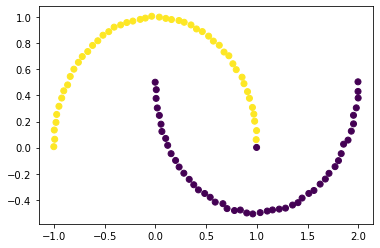

In [26]:
plt.scatter(X[:,0],X[:,1],c=result)
plt.show()